In [1]:
import matplotlib.pyplot as matplot
import seaborn as sb
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from utils import loadDataset

In [ ]:
# X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
# y = y.astype(int)
# X = X/255

In [2]:
X_train, y_train, X_valid, y_valid, X_test, y_test = loadDataset()

print('TRAIN')
print(X_train.shape, y_train.shape)
print('VALIDATION')
print(X_valid.shape, y_valid.shape)
print('TEST')
print(X_test.shape, y_test.shape)

TRAIN
(7000, 784) (7000,)
VALIDATION
(7000, 784) (7000,)
TEST
(56000, 784) (56000,)


## LINEAR SVC

First, we train a linear SVC without any parameter.

In [ ]:
# linear_SVC = SVC(kernel = 'linear')
# linear_SVC.fit(X_train, y_train)
# y_pred = linear_SVC.predict(X_test)
# score = accuracy_score(y_test, y_pred)
# print('Accuracy = ', score)

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# matplot.subplots(figsize=(10, 6))
# sb.heatmap(cm, annot = True, fmt = 'g')
# matplot.xlabel("Predicted")
# matplot.ylabel("Actual")
# matplot.title("Confusion Matrix")
# matplot.show()

Now we tune the hyperparaters of the estimator without cross validation approach.

In [ ]:
# acc = []
# acc_tr = []
# coefficient = []
# for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
#     print(c)
#     svm = SVC(kernel='linear', C=c)
#     svm.fit(X_train, y_train)
#     coef = svm.coef_
    
#     predict_train = svm.predict(X_train)
#     accuracy_train = accuracy_score(predict_train, y_train)
    
#     predict_valid = svm.predict(X_valid)
#     accuracy_valid = accuracy_score(predict_valid, y_valid)
    
#     coefficient.append(coef)
#     acc_tr.append(accuracy_train)
#     acc.append(accuracy_valid)

In [ ]:
# c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

# matplot.subplots(figsize=(10, 5))
# matplot.semilogx(c, acc,'-gD' ,color='red' , label="Validation Accuracy")
# matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
# matplot.grid(True)
# matplot.xlabel("Cost Parameter C")
# matplot.ylabel("Accuracy")
# matplot.legend()
# matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
# matplot.show()

Now, with cross-validation.

In [3]:
accuracies = []

for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = SVC(kernel='linear', C=c)
    scores = cross_val_score(svm, X_valid, y_valid, cv = 10, n_jobs = 30, verbose  = 0)
    validation_accuracy = scores.mean()
    print('C: {:8.4f} --- CV accuracy: {:.5f}'.format(c, validation_accuracy))
    accuracies += [[validation_accuracy, c]]

best_accuracy, best_c = max(accuracies)
print('Best C = ',best_c)

C:    0.000 - CV accuracy: 0.673
C:    0.001 - CV accuracy: 0.891
C:    0.010 - CV accuracy: 0.923
C:    0.100 - CV accuracy: 0.926
C:    1.000 - CV accuracy: 0.914
C:   10.000 - CV accuracy: 0.912
C:  100.000 - CV accuracy: 0.912
C: 1000.000 - CV accuracy: 0.912
C: 10000.000 - CV accuracy: 0.912
Best C =  0.1


Finally, we consider the best model and we fit it.

In [4]:
cv_linear_svc = SVC(kernel='linear', C=best_c)

start_train = time.time()
cv_linear_svc.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = cv_linear_svc.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)

print('Training time: ', time_train)
print('Test time: ', time_test)
print('Test accuracy = ', score)

Training time:  85.60434484481812
Test time:  383.4407660961151
Test accuracy =  0.9231785714285714


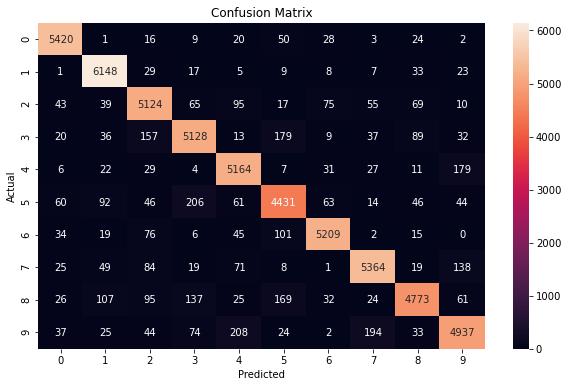

In [5]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()